In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [73]:
# Initialize model parameters
Ar = 4.7447e-8
As = 1.1253e-8
Br = 2.6831
Bs = 9.3348
Rp = 1e5
Rs = 278
c1 = 2.9457e-4
c2 = 57414
c3 = 11103
wc = 1000
xon = 0.1
xoff = 0.284
Cs = 1e-11
Vm = 1

# Initialize functions
def G(x, Vm):
    return Ar * x * np.exp(Br * np.sign(Vm) * np.sqrt(abs(Vm) / x)) + As * x * np.exp(-Bs * np.sign(Vm) * np.sqrt(abs(Vm)))

def Im(x, Vm):
    return G(x, Vm) * Vm

def w_off(x):
    return -np.exp((x - xoff) * wc)

def w_on(x):
    return -np.exp((xon - x) * wc)


In [74]:
def rhs(t, y):
    x, Vs = y
    x_dot = c1 * ((np.exp(c2 * x * Im(x, Vm)) + w_off(x)) - np.exp((-c3 * x * Im(x, Vm)) + w_on(x)))
    Vs_dot = (G(x, Vm) * Vm + (Vm / Rp) - (Vs / Rs)) * (1 / Cs)
    return [x_dot, Vs_dot]

tt = np.arange(0, 10, 0.01)
y0 = [xoff, 1]
res = solve_ivp(rhs, (tt[0], tt[-1]), y0, method='BDF', t_eval=tt)

yy = res.y
print(yy)
print(len(yy[0, :]))

[[0.284      0.28399718 0.28399439 ... 0.28267501 0.28267442 0.28267383]
 [1.         0.00335563 0.00335564 ... 0.00335973 0.00335973 0.00335973]]
1000


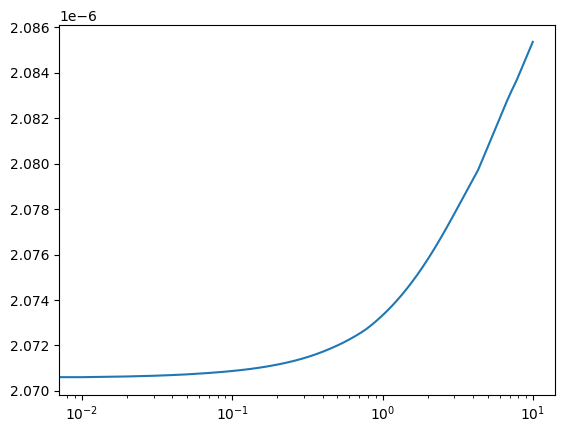

In [75]:
# Plot
current = Im(yy[0, :], 1) / 1

plt.plot(tt, current)
plt.xscale('log')
plt.show()